                                            𝐌𝐨𝐯𝐢𝐞 𝐑𝐚𝐧𝐤𝐢𝐧𝐠 & 𝐑𝐞𝐜𝐨𝐦𝐦𝐞𝐧𝐝𝐚𝐭𝐢𝐨𝐧 𝐒𝐲𝐬𝐭𝐞𝐦
                                            
We have used two dataset of from the same URL but of different size for different models
1. Movie lens 100k Dataset
https://grouplens.org/datasets/movielens/100k/

2. Movie lens 20 Million Dataset
https://grouplens.org/datasets/movielens/20m/

1. 𝐄𝐱𝐩𝐥𝐨𝐫𝐚𝐭𝐨𝐫𝐲 𝐃𝐚𝐭𝐚 𝐀𝐧𝐚𝐥𝐲𝐬𝐢𝐬 (𝐄𝐃𝐀)

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

𝐋𝐨𝐚𝐝𝐢𝐧𝐠 𝐭𝐡𝐞 𝐧𝐞𝐜𝐞𝐬𝐬𝐚𝐫𝐲 𝐟𝐢𝐥𝐞𝐬

In [22]:
# loading the necessary files
movie_ratings = pd.read_csv("ratings 20M.csv")
movie_names = pd.read_csv("movies 20M.csv")
movie_tags = pd.read_csv("tags 20M.csv")
movie_links = pd.read_csv("links 20M.csv")

𝐔𝐧𝐝𝐞𝐫𝐬𝐭𝐚𝐧𝐝𝐢𝐧𝐠 𝐭𝐡𝐞 𝐝𝐚𝐭𝐚

In [23]:
# Displaying the head and tail of the datasets
print("Movie Ratings")
print(movie_ratings)

print("\nMovie Names")
print(movie_names)

print("\nMovie Tags")
print(movie_tags.head)

print("\nMovie Links")
print(movie_links)

Movie Ratings
          userId  movieId  rating   timestamp
0              1        2     3.5  1112486027
1              1       29     3.5  1112484676
2              1       32     3.5  1112484819
3              1       47     3.5  1112484727
4              1       50     3.5  1112484580
...          ...      ...     ...         ...
20000258  138493    68954     4.5  1258126920
20000259  138493    69526     4.5  1259865108
20000260  138493    69644     3.0  1260209457
20000261  138493    70286     5.0  1258126944
20000262  138493    71619     2.5  1255811136

[20000263 rows x 4 columns]

Movie Names
       movieId                               title  \
0            1                    Toy Story (1995)   
1            2                      Jumanji (1995)   
2            3             Grumpier Old Men (1995)   
3            4            Waiting to Exhale (1995)   
4            5  Father of the Bride Part II (1995)   
...        ...                                 ...   
27273   131254

𝐔𝐧𝐝𝐞𝐫𝐬𝐭𝐚𝐧𝐝𝐢𝐧𝐠 𝐭𝐡𝐞 𝐬𝐡𝐚𝐩𝐞

In [24]:
# Checking the shape of each dataset
print("Movie Ratings Shape:", movie_ratings.shape)
print("Movie Names Shape:", movie_names.shape)
print("Movie Tags Shape:", movie_tags.shape)
print("Movie Links Shape:", movie_links.shape)

Movie Ratings Shape: (20000263, 4)
Movie Names Shape: (27278, 3)
Movie Tags Shape: (465564, 4)
Movie Links Shape: (27278, 3)


𝐂𝐨𝐥𝐮𝐦𝐧𝐬

In [25]:
# Checking the columns of each dataset
print("Movie Ratings Columns:", movie_ratings.columns)
print("Movie Names Columns:", movie_names.columns)
print("Movie Tags Columns:", movie_tags.columns)
print("Movie Links Columns:", movie_links.columns)

Movie Ratings Columns: Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')
Movie Names Columns: Index(['movieId', 'title', 'genres'], dtype='object')
Movie Tags Columns: Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')
Movie Links Columns: Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')


𝐂𝐡𝐞𝐜𝐤𝐢𝐧𝐠 𝐍𝐮𝐥𝐥 𝐕𝐚𝐥𝐮𝐞𝐬

In [26]:
# Checking for null values in each dataset
print("Movie Ratings - Null Values:\n", movie_ratings.isnull().sum())
print("\nMovie Names - Null Values:\n", movie_names.isnull().sum())
print("\nMovie Tags - Null Values:\n", movie_tags.isnull().sum())
print("\nMovie Links - Null Values:\n", movie_links.isnull().sum())

Movie Ratings - Null Values:
 userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Movie Names - Null Values:
 movieId    0
title      0
genres     0
dtype: int64

Movie Tags - Null Values:
 userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

Movie Links - Null Values:
 movieId      0
imdbId       0
tmdbId     252
dtype: int64


𝐃𝐫𝐨𝐩𝐩𝐢𝐧𝐠 𝐍𝐮𝐥𝐥 𝐕𝐚𝐥𝐮𝐞𝐬

In [27]:
# Removing null values from each dataset
movie_ratings = movie_ratings.dropna()
movie_names = movie_names.dropna()
movie_tags = movie_tags.dropna()
movie_links = movie_links.dropna()

# Confirming removal of null values
print("Null values after removal:")
print("Movie Ratings - Null Values:\n", movie_ratings.isnull().sum())
print("\nMovie Names - Null Values:\n", movie_names.isnull().sum())
print("\nMovie Tags - Null Values:\n", movie_tags.isnull().sum())
print("\nMovie Links - Null Values:\n", movie_links.isnull().sum())

Null values after removal:
Movie Ratings - Null Values:
 userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Movie Names - Null Values:
 movieId    0
title      0
genres     0
dtype: int64

Movie Tags - Null Values:
 userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

Movie Links - Null Values:
 movieId    0
imdbId     0
tmdbId     0
dtype: int64


𝐃𝐞𝐬𝐜𝐫𝐢𝐛𝐢𝐧𝐠 𝐃𝐚𝐭𝐚

In [28]:
# Displaying descriptive statistics for each dataset
print("Movie Ratings - Describe:\n", movie_ratings.describe())
print("\nMovie Names - Describe:\n", movie_names.describe(include='all'))
print("\nMovie Tags - Describe:\n", movie_tags.describe(include='all'))
print("\nMovie Links - Describe:\n", movie_links.describe(include='all'))


Movie Ratings - Describe:
              userId       movieId        rating     timestamp
count  2.000026e+07  2.000026e+07  2.000026e+07  2.000026e+07
mean   6.904587e+04  9.041567e+03  3.525529e+00  1.100918e+09
std    4.003863e+04  1.978948e+04  1.051989e+00  1.621694e+08
min    1.000000e+00  1.000000e+00  5.000000e-01  7.896520e+08
25%    3.439500e+04  9.020000e+02  3.000000e+00  9.667977e+08
50%    6.914100e+04  2.167000e+03  3.500000e+00  1.103556e+09
75%    1.036370e+05  4.770000e+03  4.000000e+00  1.225642e+09
max    1.384930e+05  1.312620e+05  5.000000e+00  1.427784e+09

Movie Names - Describe:
               movieId           title genres
count    27278.000000           27278  27278
unique            NaN           27262   1342
top               NaN  Aladdin (1992)  Drama
freq              NaN               2   4520
mean     59855.480570             NaN    NaN
std      44429.314697             NaN    NaN
min          1.000000             NaN    NaN
25%       6931.250000        

𝐂𝐡𝐞𝐜𝐤𝐢𝐧𝐠 & 𝐑𝐞𝐦𝐨𝐯𝐢𝐧𝐠 𝐃𝐮𝐩𝐥𝐢𝐜𝐚𝐭𝐞𝐬

In [29]:
# Value counts for categorical columns in each dataset
print("Movie Names - Value Counts for Categorical Columns:")
for col in movie_names.select_dtypes(include=['object']).columns:
    print(f"\nColumn: {col}\n", movie_names[col].value_counts())

print("\nMovie Tags - Value Counts for Categorical Columns:")
for col in movie_tags.select_dtypes(include=['object']).columns:
    print(f"\nColumn: {col}\n", movie_tags[col].value_counts())

print("\nMovie Links - Value Counts for Categorical Columns:")
for col in movie_links.select_dtypes(include=['object']).columns:
    print(f"\nColumn: {col}\n", movie_links[col].value_counts())


Movie Names - Value Counts for Categorical Columns:

Column: title
 title
Aladdin (1992)                                                    2
Johnny Express (2014)                                             2
Chaos (2005)                                                      2
Hamlet (2000)                                                     2
20,000 Leagues Under the Sea (1997)                               2
                                                                 ..
Tai Chi Master (Twin Warriors) (Tai ji: Zhang San Feng) (1993)    1
Splitting Heirs (1993)                                            1
Sonatine (Sonachine) (1993)                                       1
Snapper, The (1993)                                               1
Innocence (2014)                                                  1
Name: count, Length: 27262, dtype: int64

Column: genres
 genres
Drama                                                  4520
Comedy                                               

In [30]:
# Removing duplicates for all datasets
unique_movie_ratings = movie_ratings.drop_duplicates()
unique_movie_names = movie_names.drop_duplicates()
unique_movie_tags = movie_tags.drop_duplicates()
unique_movie_links = movie_links.drop_duplicates()

# Checking the shape of the original and deduplicated datasets
print("Original vs Unique Shapes:")
print("Movie Ratings - Original:", movie_ratings.shape, "Unique:", unique_movie_ratings.shape)
print("Movie Names - Original:", movie_names.shape, "Unique:", unique_movie_names.shape)
print("Movie Tags - Original:", movie_tags.shape, "Unique:", unique_movie_tags.shape)
print("Movie Links - Original:", movie_links.shape, "Unique:", unique_movie_links.shape)

Original vs Unique Shapes:
Movie Ratings - Original: (20000263, 4) Unique: (20000263, 4)
Movie Names - Original: (27278, 3) Unique: (27278, 3)
Movie Tags - Original: (465548, 4) Unique: (465548, 4)
Movie Links - Original: (27026, 3) Unique: (27026, 3)


𝐒𝐞𝐠𝐫𝐞𝐠𝐚𝐭𝐢𝐧𝐠

In [31]:
# Displaying unique values for all columns in each dataset
print("Unique Values in Movie Ratings:")
for col in movie_ratings.columns:
    print(f"{col}: {movie_ratings[col].nunique()} unique values")

print("\nUnique Values in Movie Names:")
for col in movie_names.columns:
    print(f"{col}: {movie_names[col].nunique()} unique values")

print("\nUnique Values in Movie Tags:")
for col in movie_tags.columns:
    print(f"{col}: {movie_tags[col].nunique()} unique values")

print("\nUnique Values in Movie Links:")
for col in movie_links.columns:
    print(f"{col}: {movie_links[col].nunique()} unique values")


Unique Values in Movie Ratings:
userId: 138493 unique values
movieId: 26744 unique values
rating: 10 unique values
timestamp: 15351121 unique values

Unique Values in Movie Names:
movieId: 27278 unique values
title: 27262 unique values
genres: 1342 unique values

Unique Values in Movie Tags:
userId: 7801 unique values
movieId: 19545 unique values
tag: 38643 unique values
timestamp: 425357 unique values

Unique Values in Movie Links:
movieId: 27026 unique values
imdbId: 27026 unique values
tmdbId: 27008 unique values


𝐆𝐥𝐢𝐦𝐩𝐬𝐞 𝐭𝐨 𝐔𝐧𝐝𝐞𝐫𝐬𝐭𝐚𝐧𝐝 𝐃𝐚𝐭𝐚 𝐕𝐢𝐬𝐮𝐚𝐥𝐥𝐲

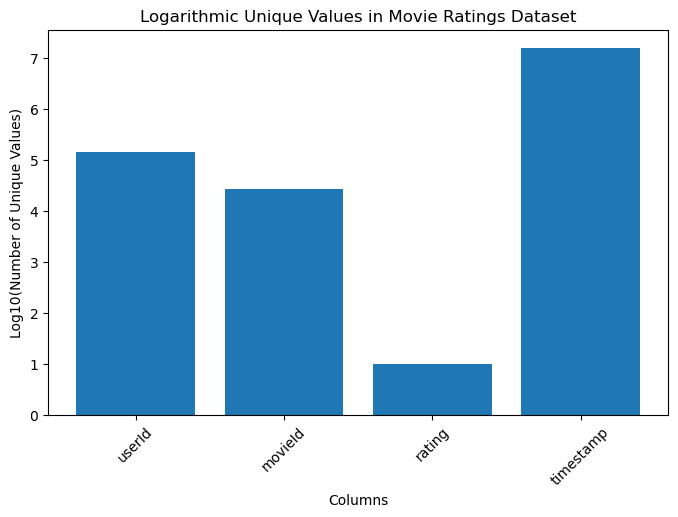

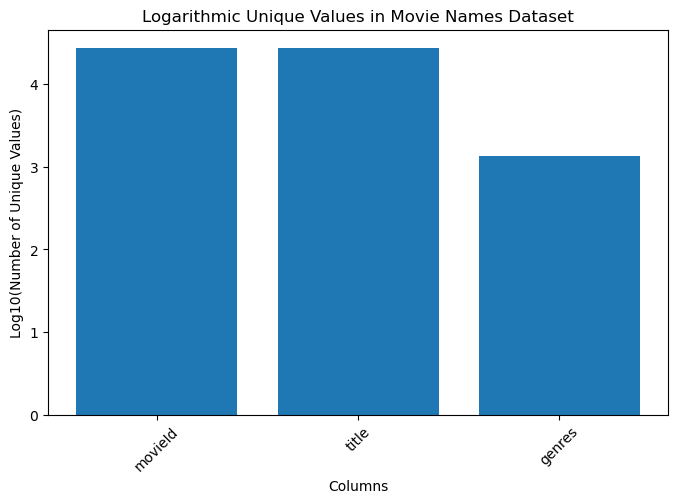

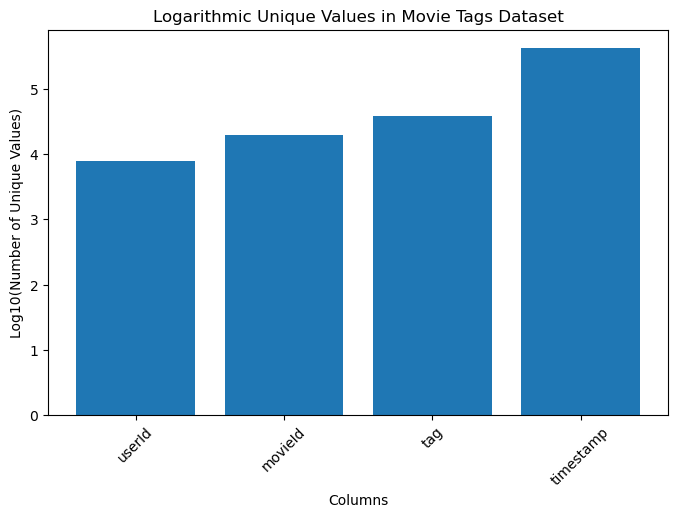

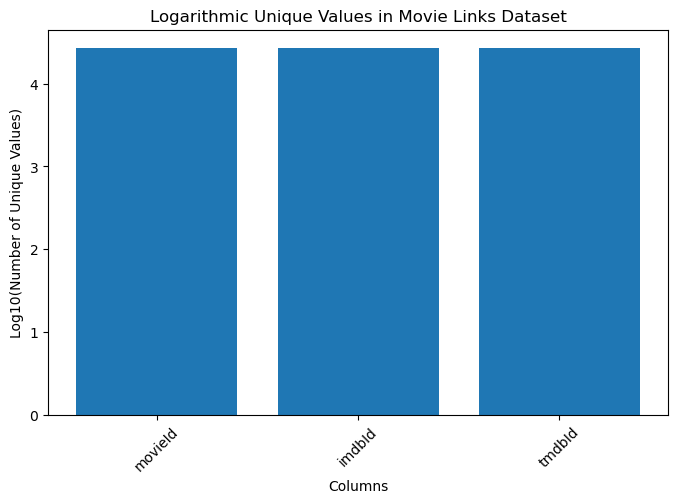

In [32]:
# Dictionary to store unique values for each dataset
unique_values = {
    "Movie Ratings": {col: movie_ratings[col].nunique() for col in movie_ratings.columns},
    "Movie Names": {col: movie_names[col].nunique() for col in movie_names.columns},
    "Movie Tags": {col: movie_tags[col].nunique() for col in movie_tags.columns},
    "Movie Links": {col: movie_links[col].nunique() for col in movie_links.columns},
}

# Plotting bar charts for each dataset with log scale
for dataset_name, col_values in unique_values.items():
    plt.figure(figsize=(8, 5))
    plt.bar(col_values.keys(), np.log10(list(col_values.values())))
    plt.title(f"Logarithmic Unique Values in {dataset_name} Dataset")
    plt.xlabel("Columns")
    plt.ylabel("Log10(Number of Unique Values)")
    plt.xticks(rotation=45)
    plt.show()


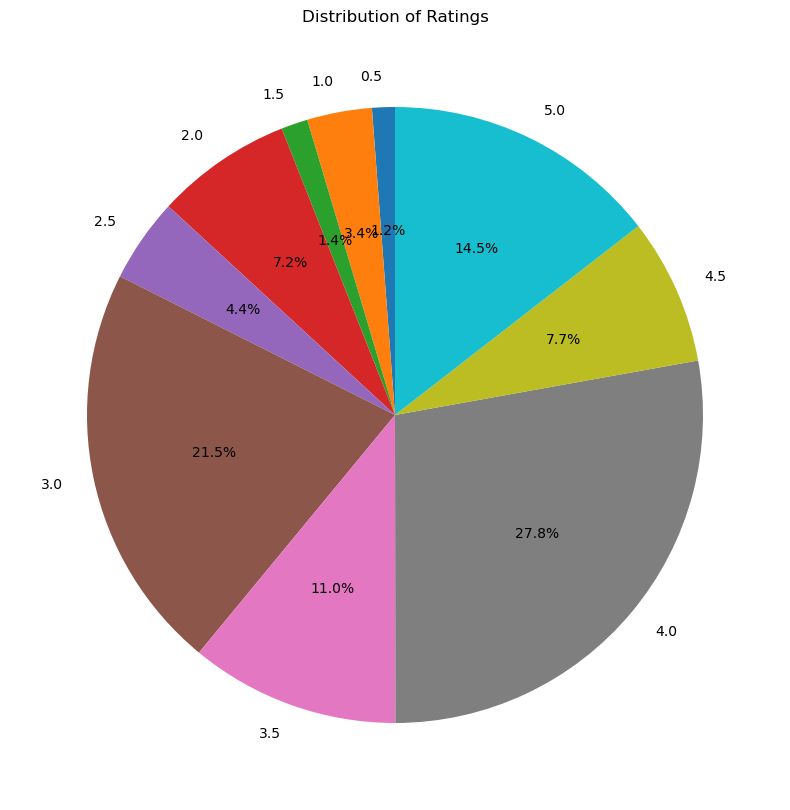

In [33]:
# Plotting distribution of ratings as a pie chart
plt.figure(figsize=(10, 10))
rating_distribution = movie_ratings['rating'].value_counts().sort_index()
rating_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.tab10.colors)
plt.title("Distribution of Ratings")
plt.ylabel("")  # Remove y-axis label for better visualization
plt.show()


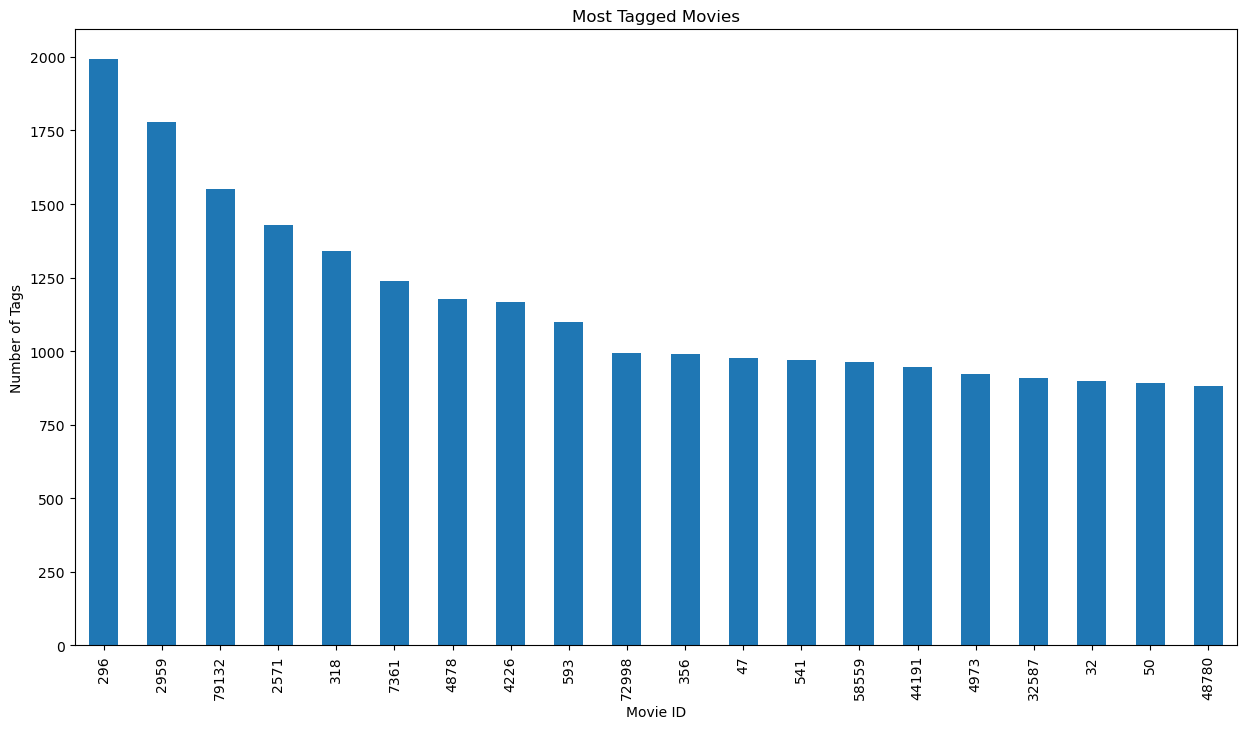

In [34]:
# Plotting most tagged movies
most_tagged_movies = movie_tags['movieId'].value_counts().head(20)
plt.figure(figsize=(15,8))
most_tagged_movies.plot(kind='bar')
plt.title("Most Tagged Movies")
plt.xlabel("Movie ID")
plt.ylabel("Number of Tags")
plt.show()


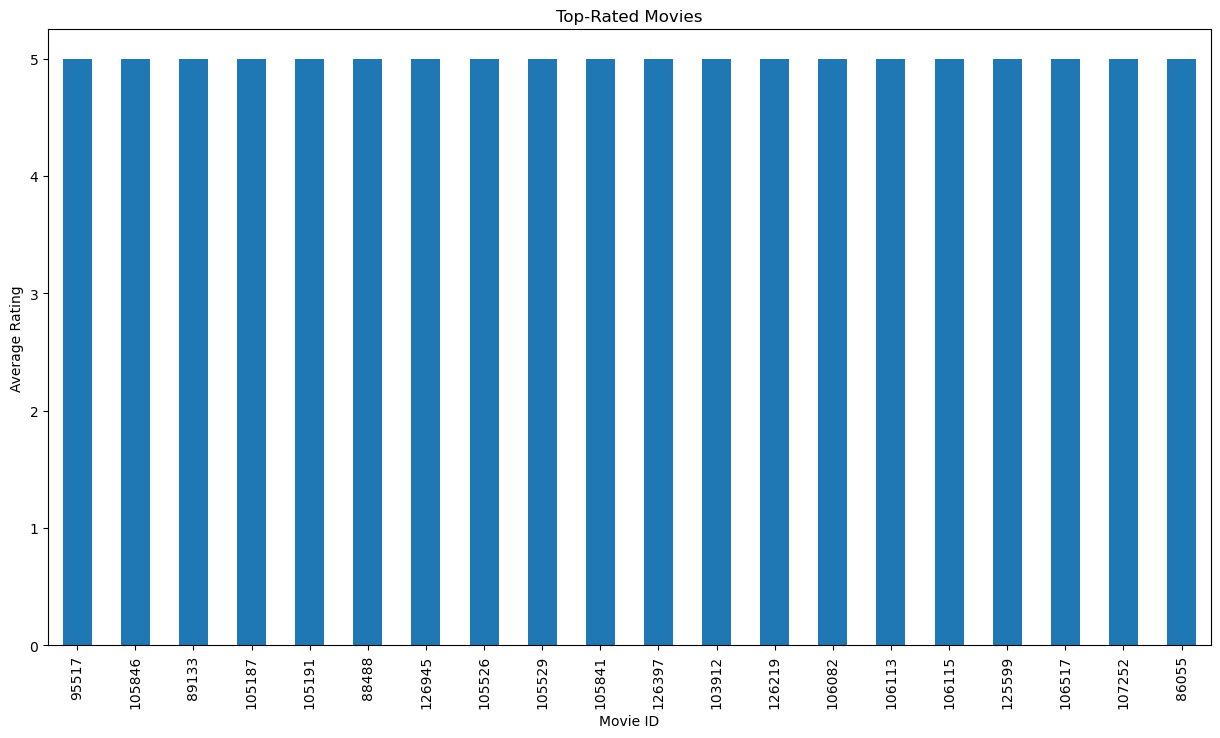

In [35]:
# Top-rated movies (average rating >= 4.5)
top_rated = movie_ratings.groupby('movieId')['rating'].mean().sort_values(ascending=False).head(20)
plt.figure(figsize=(15,8))
top_rated.plot(kind='bar')
plt.title("Top-Rated Movies")
plt.xlabel("Movie ID")
plt.ylabel("Average Rating")
plt.show()


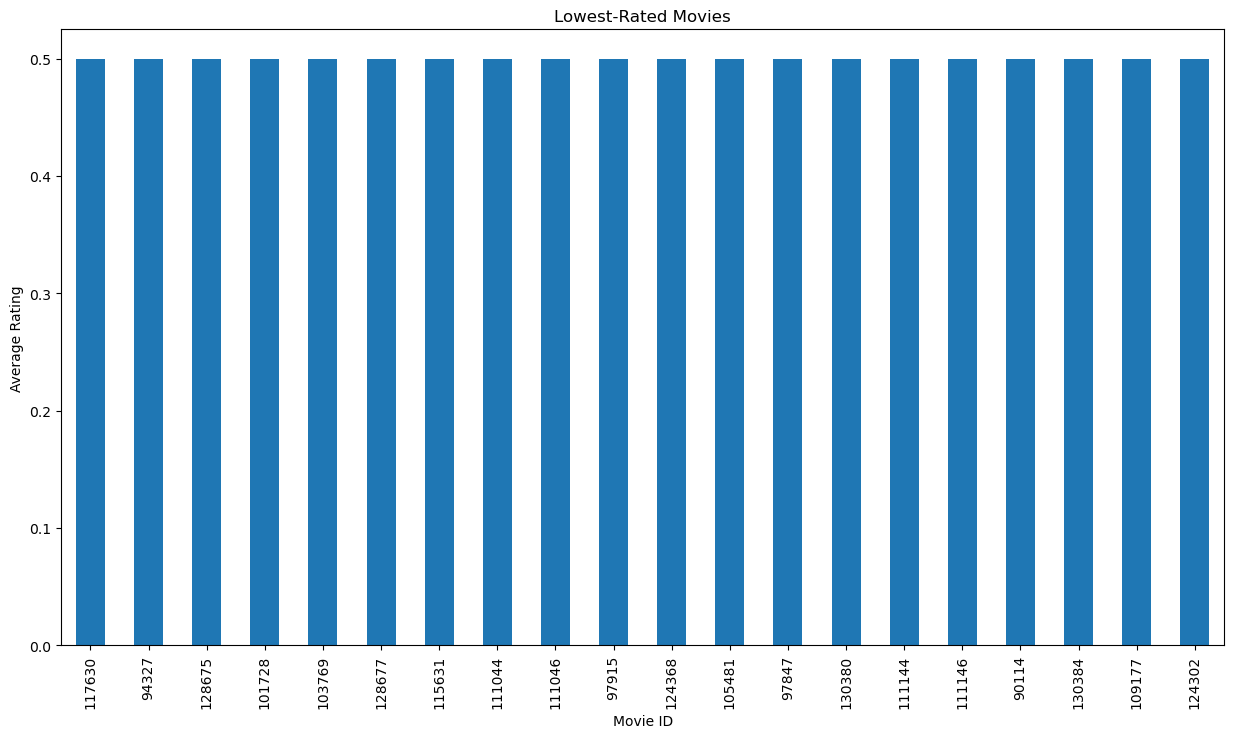

In [36]:
# Lowest-rated movies (average rating <= 2.0)
lowest_rated = movie_ratings.groupby('movieId')['rating'].mean().sort_values(ascending=True).head(20)
plt.figure(figsize=(15,8))
lowest_rated.plot(kind='bar')
plt.title("Lowest-Rated Movies")
plt.xlabel("Movie ID")
plt.ylabel("Average Rating")
plt.show()


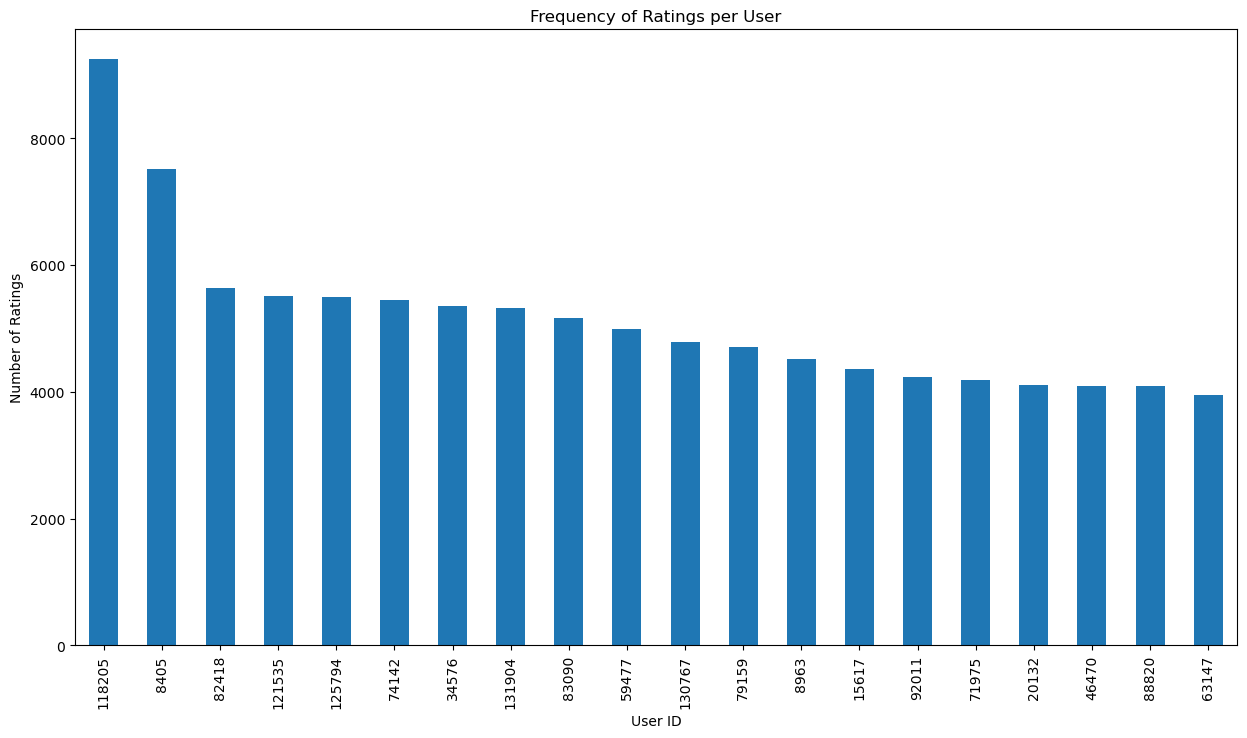

In [37]:
# Frequency of ratings per user
ratings_per_user = movie_ratings['userId'].value_counts().head(20)
plt.figure(figsize=(15,8))
ratings_per_user.plot(kind='bar')
plt.title("Frequency of Ratings per User")
plt.xlabel("User ID")
plt.ylabel("Number of Ratings")
plt.show()


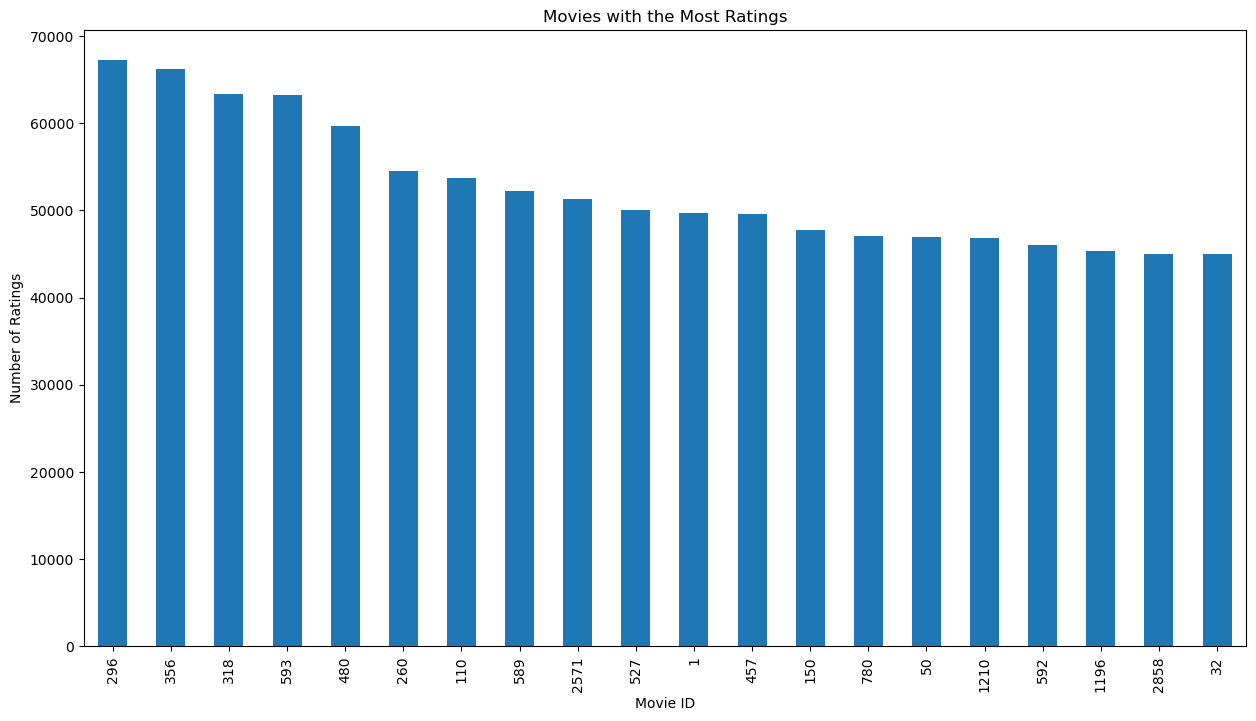

In [38]:
# Movies with the most ratings
most_rated_movies = movie_ratings['movieId'].value_counts().head(20)
plt.figure(figsize=(15, 8))
most_rated_movies.plot(kind='bar')
plt.title("Movies with the Most Ratings")
plt.xlabel("Movie ID")
plt.ylabel("Number of Ratings")
plt.show()


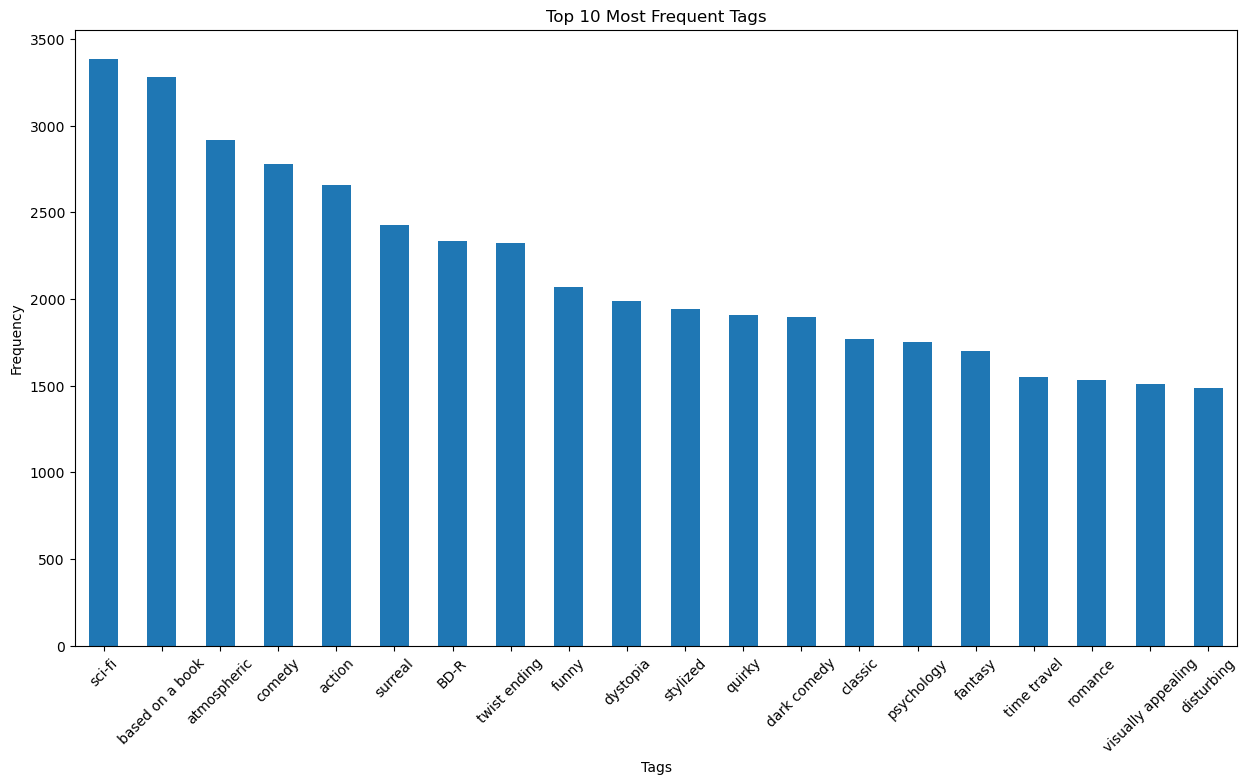

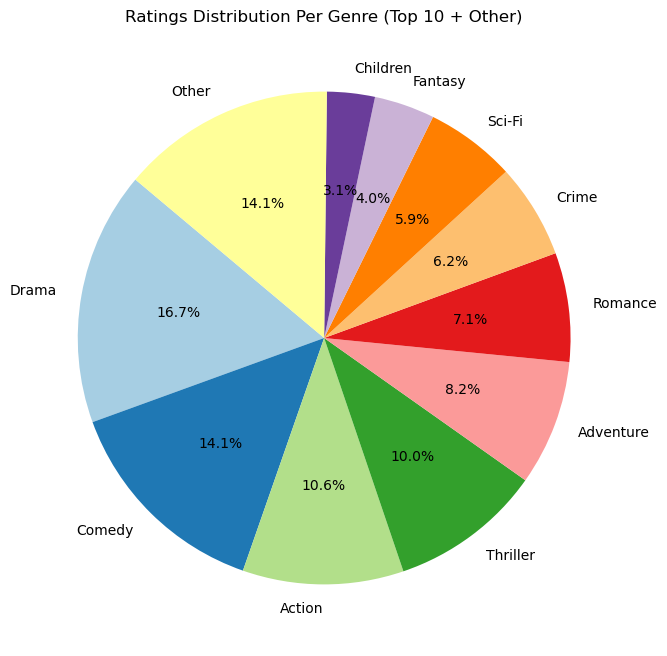

In [39]:
# Tags distribution analysis
tag_counts = movie_tags['tag'].value_counts().head(20)
plt.figure(figsize=(15, 8))
tag_counts.plot(kind='bar')
plt.title("Top 10 Most Frequent Tags")
plt.xlabel("Tags")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

# Splitting genres into individual rows
movies_genres = movie_names.copy()
movies_genres = movies_genres.assign(genres=movies_genres['genres'].str.split('|')).explode('genres')

# Merging ratings with genres
ratings_with_genres = movie_ratings.merge(movies_genres[['movieId', 'genres']], on='movieId', how='inner')

# Grouping by genre to get the count of ratings per genre
ratings_per_genre = ratings_with_genres.groupby('genres')['rating'].count()

# Focusing on the top 10 genres and grouping the rest as "Other"
top_genres = ratings_per_genre.nlargest(10)
other_genres = ratings_per_genre.sum() - top_genres.sum()

# Combining top genres with "Other"
ratings_per_genre_reduced = pd.concat([top_genres, pd.Series({'Other': other_genres})])

# Plotting the updated pie chart
plt.figure(figsize=(10, 8))
ratings_per_genre_reduced.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Ratings Distribution Per Genre (Top 10 + Other)")
plt.ylabel("")  # Remove the default y-label for better visualization
plt.show()


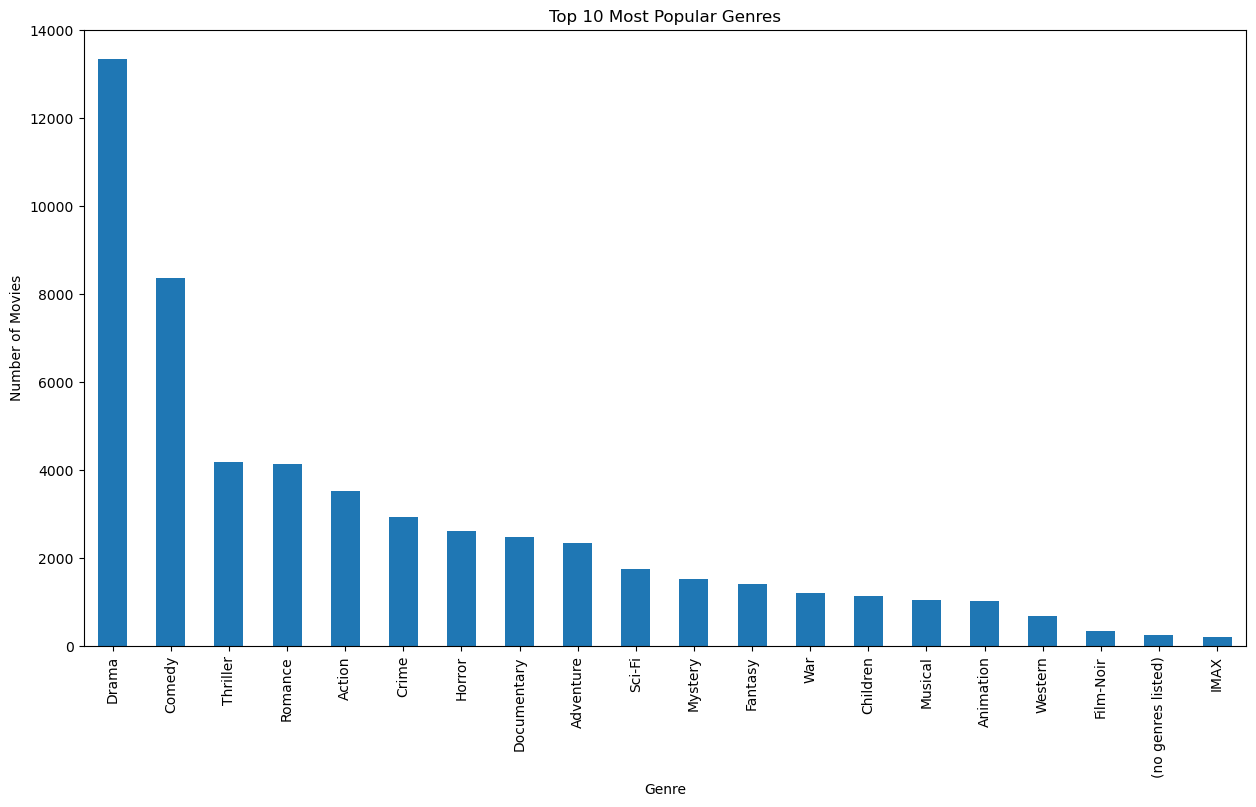

In [40]:
# Genre popularity (based on number of movies)
genre_split = movie_names['genres'].str.split('|', expand=True).stack()
genre_counts = genre_split.value_counts().head(20)
plt.figure(figsize=(15, 8))
genre_counts.plot(kind='bar')
plt.title("Top 10 Most Popular Genres")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.show()


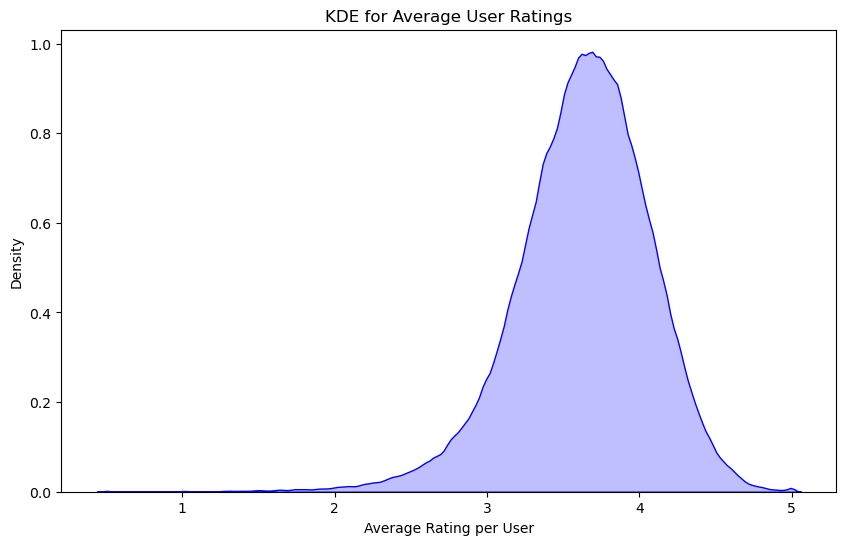

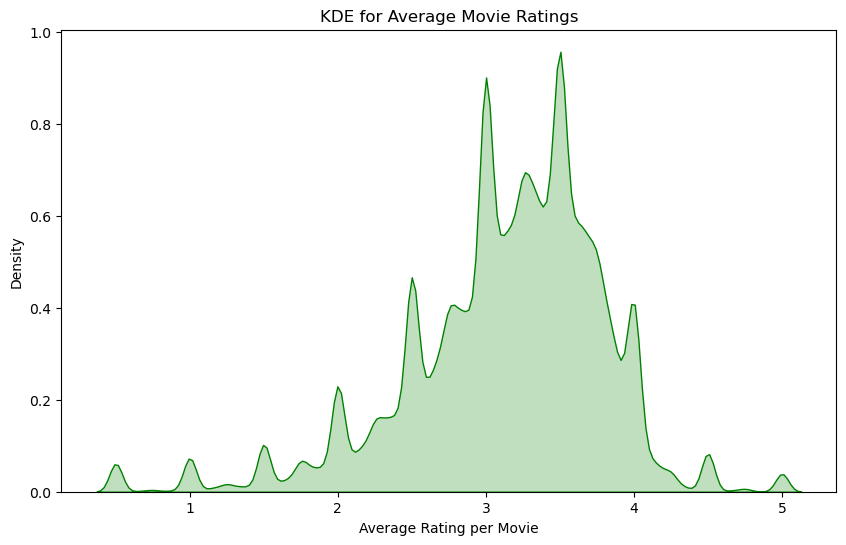

In [41]:
# Calculate average ratings per user
avg_ratings_per_user = movie_ratings.groupby('userId')['rating'].mean()

# Plot KDE for average user ratings
plt.figure(figsize=(10, 6))
sns.kdeplot(data=avg_ratings_per_user, fill=True, color='blue', bw_adjust=0.5)
plt.title("KDE for Average User Ratings")
plt.xlabel("Average Rating per User")
plt.ylabel("Density")
plt.show()


# Calculate average ratings per movie
avg_ratings_per_movie = movie_ratings.groupby('movieId')['rating'].mean()

# Plot KDE for average movie ratings
plt.figure(figsize=(10, 6))
sns.kdeplot(data=avg_ratings_per_movie, fill=True, color='green', bw_adjust=0.5)
plt.title("KDE for Average Movie Ratings")
plt.xlabel("Average Rating per Movie")
plt.ylabel("Density")
plt.show()



𝐂𝐡𝐞𝐜𝐤𝐢𝐧𝐠 𝐎𝐮𝐭𝐥𝐢𝐞𝐫𝐬

Number of outliers: 919857

Sample outliers:
     userId  movieId  rating   timestamp
380       3     2541     1.0   944897441
390       3     2643     1.0   945176099
394       3     2676     1.0   944897405
426       4       32     1.0   840879061
540       6     1073     1.0   858275558
581       7      806     1.0  1011206295
598       7     1095     1.0  1011205422
808       7     4848     1.0  1011204747
821       8       19     1.0   833981918
832       8      172     1.0   833982178


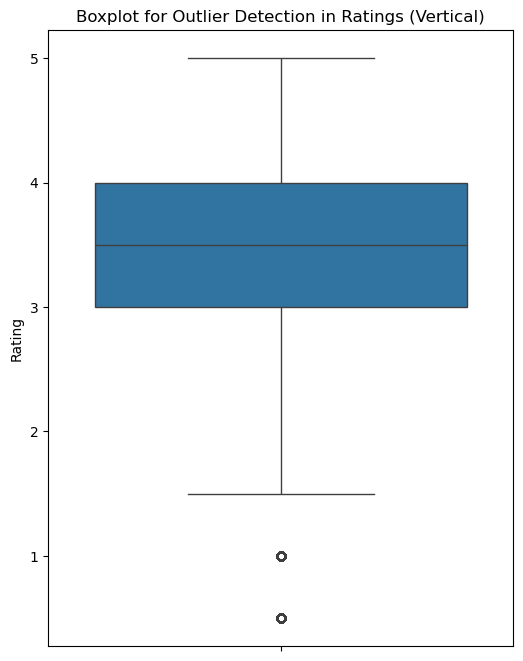

In [42]:
# Outlier detection using IQR for the 'rating' column
Q1 = movie_ratings['rating'].quantile(0.25)  # First quartile (25th percentile)
Q3 = movie_ratings['rating'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = movie_ratings[(movie_ratings['rating'] < lower_bound) | (movie_ratings['rating'] > upper_bound)]

# Summary
print(f"Number of outliers: {outliers.shape[0]}")
print("\nSample outliers:")
print(outliers.head(10))

# Visualizing outliers in the 'rating' column using a vertical boxplot
plt.figure(figsize=(6, 8))
sns.boxplot(y=movie_ratings['rating'])
plt.title("Boxplot for Outlier Detection in Ratings (Vertical)")
plt.ylabel("Rating")
plt.show()



𝐂𝐨𝐫𝐫𝐞𝐥𝐚𝐭𝐢𝐨𝐧 𝐌𝐚𝐭𝐫𝐢𝐱 𝐭𝐨 𝐔𝐧𝐝𝐞𝐫𝐬𝐭𝐚𝐧𝐝 𝐕𝐚𝐫𝐢𝐚𝐧𝐜𝐞

/var/folders/yj/hdwkpsfn7d3f_bdjkwg0cgs00000gn/T/ipykernel_31346/1016038619.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data['tag'].fillna('Unknown', inplace=True)


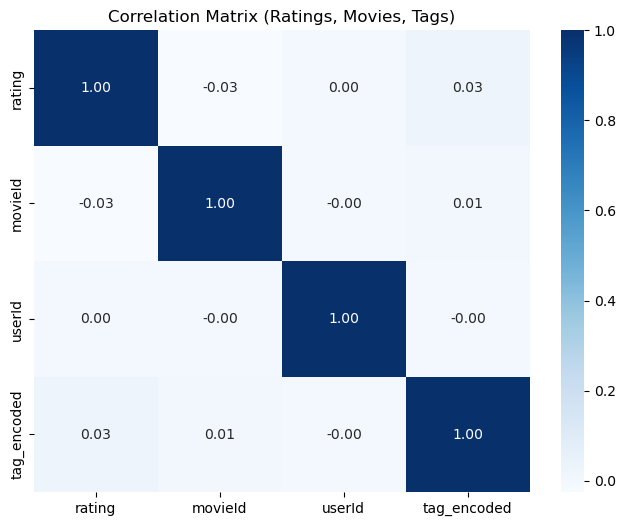

In [43]:
# Step 1: Sampling the data to make it manageable
movie_ratings_sample = movie_ratings.sample(frac=0.15, random_state=42)  # Use 10% of ratings
movie_tags_sample = movie_tags.sample(frac=0.15, random_state=42)  # Use 10% of tags

# Step 2: Merging the sampled datasets on 'movieId'
combined_data = movie_ratings_sample.merge(movie_tags_sample[['movieId', 'tag']], on='movieId', how='left')

# Step 3: Handling missing values in the 'tag' column
combined_data['tag'].fillna('Unknown', inplace=True)

# Step 4: Encoding 'tag' as numerical values for correlation
combined_data['tag_encoded'] = combined_data['tag'].astype('category').cat.codes

# Step 5: Selecting relevant columns for the correlation matrix
correlation_data = combined_data[['rating', 'movieId', 'userId', 'tag_encoded']]

# Step 6: Calculating the correlation matrix
correlation_matrix = correlation_data.corr()

# Step 7: Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Matrix (Ratings, Movies, Tags)")
plt.show()


𝟏. 𝐔𝐬𝐞𝐫 𝐛𝐚𝐬𝐞𝐝 𝐜𝐨𝐥𝐥𝐚𝐛𝐨𝐫𝐚𝐭𝐢𝐯𝐞 𝐟𝐢𝐥𝐭𝐞𝐫

In [16]:
from surprise import Dataset, Reader
from surprise import KNNWithMeans, KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [17]:
# loading the necessary files
movie_ratings = pd.read_csv("ratings.csv")
movie_names = pd.read_csv("movies.csv")
movie_tags = pd.read_csv("tags.csv")
movie_links = pd.read_csv("links.csv")

In [18]:


# Prepare the data for Surprise
reader = Reader(rating_scale=(movie_ratings['rating'].min(), movie_ratings['rating'].max()))
data = Dataset.load_from_df(movie_ratings[['userId', 'movieId', 'rating']], reader)

# Optimize data types
movie_ratings['userId'] = movie_ratings['userId'].astype('int32')
movie_ratings['movieId'] = movie_ratings['movieId'].astype('int32')
movie_ratings['rating'] = movie_ratings['rating'].astype('float32')

# Split data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Use KNNWithMeans for user-user collaborative filtering
algo = KNNWithMeans(k=20, min_k=5, sim_options={'name':'pearson','user_based': True})

# Train the algorithm on the trainset
algo.fit(trainset)

# Test the algorithm on the testset and calculate RMSE
predictions = algo.test(testset)
print("RMSE for KNNWithMeans:")
accuracy.rmse(predictions)

# Predict ratings for all items the user hasn't rated
def predict_all_items(user_id, algo, trainset, movie_ratings):
    # Get all movies in the dataset
    all_movie_ids = movie_ratings['movieId'].unique()

    # Get movies already rated by the user
    user_inner_id = trainset.to_inner_uid(user_id)
    user_rated_movies = [trainset.to_raw_iid(item[0]) for item in trainset.ur[user_inner_id]]

    # Get unrated movies for the user
    unrated_movies = set(all_movie_ids) - set(user_rated_movies)

    # Predict ratings for all unrated movies
    predictions = []
    for movie_id in unrated_movies:
        pred = algo.predict(uid=user_id, iid=movie_id)
        predictions.append((movie_id, pred.est))

    # Sort predictions by estimated rating (descending)
    predictions = sorted(predictions, key=lambda x: x[1], reverse=True)
    return predictions

# Example: Predict for user ID 1
user_id = 145 # Replace with your user ID
all_predictions = predict_all_items(user_id, algo, trainset, movie_ratings)

# Display predictions
print(f"Predicted ratings for user {user_id}:")
for movie_id, rating in all_predictions[:10]:  # Display top 10 recommendations
    print(f"Movie ID: {movie_id}, Predicted Rating: :{rating:.2f}")


Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE for KNNWithMeans:
RMSE: 0.9007
Predicted ratings for user 145:
Movie ID: 1227, Predicted Rating: :4.58
Movie ID: 1411, Predicted Rating: :4.51
Movie ID: 168252, Predicted Rating: :4.46
Movie ID: 5992, Predicted Rating: :4.40
Movie ID: 112552, Predicted Rating: :4.38
Movie ID: 899, Predicted Rating: :4.37
Movie ID: 1172, Predicted Rating: :4.37
Movie ID: 3030, Predicted Rating: :4.34
Movie ID: 1248, Predicted Rating: :4.34
Movie ID: 7132, Predicted Rating: :4.33


𝐄𝐯𝐚𝐥𝐮𝐚𝐭𝐢𝐨𝐧 𝐨𝐟 𝐌𝐨𝐝𝐞𝐥

Accuracy Metrics:
RMSE: 0.9007
MAE:  0.6865
Precision: 0.7705
Recall: 0.7231
F1 Score: 0.7461
ROC AUC Score: 0.7702


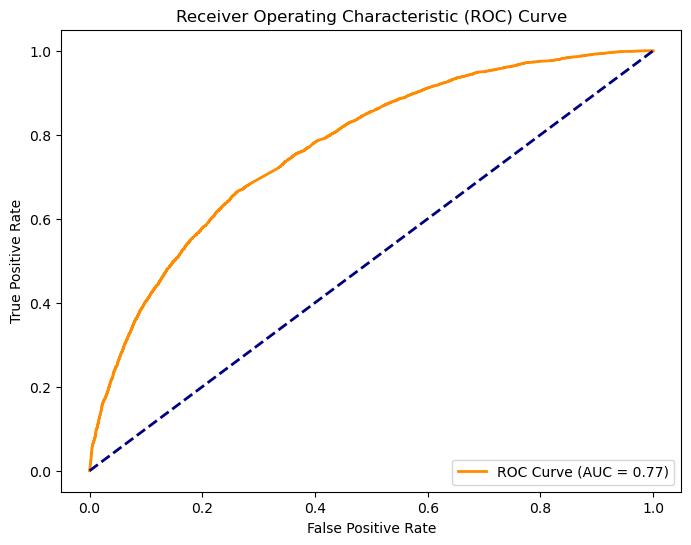

In [20]:
# Evaluate RMSE and MAE (accuracy metrics) from Surprise
print("Accuracy Metrics:")
rmse = accuracy.rmse(predictions, verbose=True)
mae = accuracy.mae(predictions, verbose=True)

# Convert Surprise predictions to binary for precision, recall, and F1
threshold = 3.5  # Threshold for positive prediction (like/dislike)
y_true = np.array([int(pred.r_ui >= threshold) for pred in predictions])  # Ground truth
y_pred = np.array([int(pred.est >= threshold) for pred in predictions])  # Predicted ratings

# Calculate Precision, Recall, F1 Score
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="binary")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Calculate ROC AUC Score
roc_auc = roc_auc_score(y_true, [pred.est for pred in predictions])
print(f"ROC AUC Score: {roc_auc:.4f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_true, [pred.est for pred in predictions])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()






𝟐. 𝐈𝐭𝐞𝐦 𝐛𝐚𝐬𝐞𝐝 𝐜𝐨𝐥𝐥𝐚𝐛𝐨𝐫𝐚𝐭𝐢𝐯𝐞 𝐟𝐢𝐥𝐭𝐞𝐫

In [23]:
import pandas as pd
import numpy as np
from surprise import Dataset, Reader, KNNWithMeans
from surprise.model_selection import train_test_split, GridSearchCV
from surprise import accuracy
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [4]:
# Step 1: Load your dataset
movie_ratings = pd.read_csv("ratings 20M.csv")
movie_names = pd.read_csv("movies 20M.csv")
movie_tags = pd.read_csv("tags 20M.csv")
movie_links = pd.read_csv("links 20M.csv")

In [18]:
# Load your dataset
movie_ratings = pd.read_csv("ratings 20M.csv")
movie_names = pd.read_csv("movies 20M.csv")

# Prepare the data for Surprise
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(movie_ratings[['userId', 'movieId', 'rating']], reader)

# Train-test split
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Train the item-based collaborative filtering model
sim_options = {
    "name": "pearson",  # You can use 'cosine' or 'pearson'
    "user_based": False  # Item-based filtering
}
algo = KNNWithMeans(sim_options=sim_options)
algo.fit(trainset)

# Choose a user ID for prediction
user_id = 1

# Predict ratings for all items the user hasn't rated
all_movie_ids = movie_ratings['movieId'].unique()
rated_movie_ids = movie_ratings[movie_ratings['userId'] == user_id]['movieId']
unrated_movie_ids = set(all_movie_ids) - set(rated_movie_ids)

predictions = [
    (movie_id, algo.predict(user_id, movie_id).est) for movie_id in unrated_movie_ids
]

# Convert predictions to a DataFrame
predictions_df = pd.DataFrame(predictions, columns=["movieId", "predicted_rating"])

# Add movie names to the DataFrame
predictions_df = predictions_df.merge(movie_names, on="movieId", how="left")

# Divide predictions into quartiles
quartiles = pd.qcut(predictions_df['predicted_rating'], 4, labels=["1-2", "2-3", "3-4", "4-5"])
predictions_df['rating_quartile'] = quartiles

# Sort by quartile and rating
predictions_df = predictions_df.sort_values(by=["rating_quartile", "predicted_rating"], ascending=[True, False])

# Group and format the output
quartile_groups = predictions_df.groupby("rating_quartile")

print("Recommendations grouped by quartiles:")
for quartile, group in quartile_groups:
    print(f"\nInterval {quartile} Recommendations:")
    for _, row in group.head(5).iterrows():
        print(
            f"Movie ID: {row['movieId']}, Movie Name: {row['title']} "
            f"- Predicted Rating: {row['predicted_rating']:.2f}"
        )


Computing the pearson similarity matrix...
Done computing similarity matrix.
Recommendations grouped by quartiles:

Interval 1-2 Recommendations:
Movie ID: 67300, Movie Name: Immortal Sergeant (1943) - Predicted Rating: 3.00
Movie ID: 91533, Movie Name: Dacii (1967) - Predicted Rating: 3.00
Movie ID: 3234, Movie Name: Train Ride to Hollywood (1975) - Predicted Rating: 3.00
Movie ID: 91871, Movie Name: Idol of the Crowds (1937) - Predicted Rating: 3.00
Movie ID: 4762, Movie Name: Djomeh (2000) - Predicted Rating: 3.00

Interval 2-3 Recommendations:
Movie ID: 25879, Movie Name: All Through the Night (1941) - Predicted Rating: 3.40
Movie ID: 69453, Movie Name: Land That Time Forgot, The (1975) - Predicted Rating: 3.40
Movie ID: 89060, Movie Name: Cold Prey (Fritt Vilt) (2006) - Predicted Rating: 3.40
Movie ID: 335, Movie Name: Underneath (1995) - Predicted Rating: 3.40
Movie ID: 109321, Movie Name: Painting, The (Tableau, Le) (2011) - Predicted Rating: 3.40

Interval 3-4 Recommendations:


/var/folders/yj/hdwkpsfn7d3f_bdjkwg0cgs00000gn/T/ipykernel_71115/2752761090.py:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quartile_groups = predictions_df.groupby("rating_quartile")


𝐄𝐯𝐚𝐥𝐮𝐚𝐭𝐢𝐨𝐧 𝐨𝐟 𝐌𝐨𝐝𝐞𝐥

RMSE: 0.8168


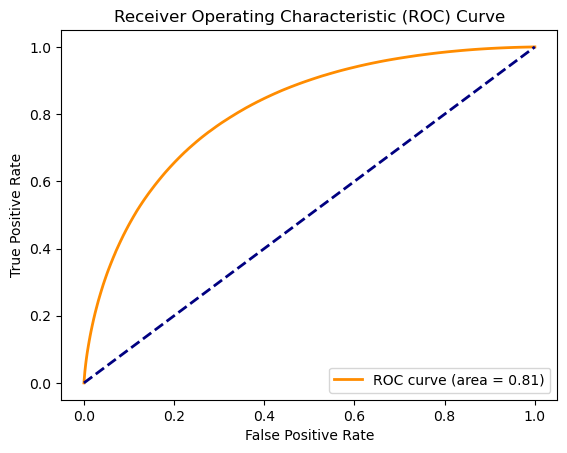


Model Performance Metrics:
RMSE: 0.8168
Precision: 0.8027
Recall: 0.7628
F1 Score: 0.7823
ROC-AUC: 0.8113


In [5]:
# Step 1: Calculate RMSE on the test set
predictions = algo.test(testset)
rmse = accuracy.rmse(predictions)

# Step 2: Convert predictions to binary (e.g., threshold 3.5 for relevance)
threshold = 3.5  # Define a threshold for relevant items
y_true = [1 if true_r >= threshold else 0 for (_, _, true_r, _, _) in predictions]
y_pred = [1 if est >= threshold else 0 for (_, _, _, est, _) in predictions]

# Step 3: Calculate Precision, Recall, and F1-score
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Step 4: Prepare for ROC-AUC Calculation
y_scores = [est for (_, _, _, est, _) in predictions]
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Step 5: Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# Step 6: Print Metrics
print("\nModel Performance Metrics:")
print(f"RMSE: {rmse:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")


𝟑. 𝐒𝐕𝐃 - (𝐒𝐢𝐧𝐠𝐮𝐥𝐚𝐫 𝐕𝐚𝐥𝐮𝐞 𝐃𝐞𝐜𝐨𝐦𝐩𝐨𝐬𝐢𝐭𝐢𝐨𝐧)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math
import scipy
from sklearn.model_selection import train_test_split
from scipy.sparse.linalg import svds
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import train_test_split, cross_validate
from surprise import Reader
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve, auc

In [1]:
# Import necessary libraries
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split, RandomizedSearchCV
from surprise import accuracy
import pandas as pd

# Load the movie_ratings dataset (ratings.csv)
ratings_file = "ratings 20M.csv"
movies_file = "movies 20M.csv"  # Assuming this contains movieId and title

# Define the format of the dataset for Surprise
reader = Reader(line_format="user item rating timestamp", sep=",", skip_lines=1)

# Load the data into a Surprise Dataset
data = Dataset.load_from_file(ratings_file, reader=reader)

# Load movie names for later use
movie_names = pd.read_csv(movies_file)

# Ensure both columns have the same data type
movie_names['movieId'] = movie_names['movieId'].astype(int)

# Split the data into training and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_factors': [50, 75, 100],
    'lr_all': [0.002, 0.005, 0.01],
    'reg_all': [0.02, 0.1, 0.2]
}

# Use RandomizedSearchCV to tune hyperparameters
random_search = RandomizedSearchCV(SVD, param_grid, n_iter=3, cv=2, random_state=42, n_jobs=-1)
random_search.fit(data)

# Get the best model from the search
best_svd_model = random_search.best_estimator['rmse']
print("Best Parameters:", random_search.best_params['rmse'])
print("Best RMSE:", random_search.best_score['rmse'])

# Train the best model on the training set
best_svd_model.fit(trainset)

# Test the model on the test set
predictions = best_svd_model.test(testset)

# Evaluate the model
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

# Create a DataFrame for predictions
predictions_df = pd.DataFrame([(pred.uid, int(pred.iid), pred.r_ui, pred.est) for pred in predictions],
                              columns=['userId', 'movieId', 'actual', 'predicted'])

# Merge movie names
predictions_df = predictions_df.merge(movie_names, on='movieId')

# Helper function to search for movies by name
def search_movie_by_name(partial_name, movie_names):
    results = movie_names[movie_names['title'].str.contains(partial_name, case=False, na=False)]
    if results.empty:
        print("No movies found with that name. Try again.")
        return None
    return results

# Function to recommend movies in intervals based on the selected movie's context
def recommend_movies_in_intervals(selected_movie_id, predictions_df, num_recommendations=5):
    # Find users who rated the selected movie
    selected_movie_users = predictions_df[predictions_df['movieId'] == selected_movie_id]['userId'].unique()
    
    # Filter predictions for these users and exclude the selected movie
    similar_movies = predictions_df[
        (predictions_df['userId'].isin(selected_movie_users)) &
        (predictions_df['movieId'] != selected_movie_id)
    ]
    
    # Sort by predicted ratings
    similar_movies = similar_movies.sort_values(by='predicted', ascending=False)
    
    # Define intervals
    intervals = [
        (4, 5, "4-5"),
        (3, 4, "3-4"),
        (2, 3, "2-3"),
        (1, 2, "1-2"),
    ]
    
    # Display recommendations for each interval
    for lower, upper, label in intervals:
        interval_movies = similar_movies[
            (similar_movies['predicted'] >= lower) & (similar_movies['predicted'] < upper)
        ].head(num_recommendations)
        
        print(f"\nRecommendations in range {label}:")
        if interval_movies.empty:
            print("No recommendations available in this range.")
        else:
            for _, row in interval_movies.iterrows():
                print(f"{row['title']} - Predicted Rating: {round(row['predicted'], 2)}")

# Main function for searching and getting recommendations
def movie_recommendation_system():
    while True:
        # Step 1: Ask user to input a partial movie name
        partial_name = input("Enter a partial movie name (or 'exit' to quit): ").strip()
        if partial_name.lower() == 'exit':
            break
        
        # Step 2: Search for matching movies
        search_results = search_movie_by_name(partial_name, movie_names)
        if search_results is not None and not search_results.empty:
            print("\nMovies Found:")
            for _, row in search_results.iterrows():
                print(f"Movie ID: {row['movieId']}, Title: {row['title']}")
            
            # Step 3: Ask user to select a movie by ID
            try:
                selected_movie_id = int(input("\nEnter the Movie ID for recommendations: ").strip())
                if selected_movie_id in search_results['movieId'].values:
                    recommend_movies_in_intervals(selected_movie_id, predictions_df)
                else:
                    print("Invalid Movie ID. Try again.")
            except ValueError:
                print("Please enter a valid numeric Movie ID.")
        else:
            print("No movies found with that name. Try again.")

# Run the interactive system
movie_recommendation_system()

/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'n_factors': 50, 'lr_all': 0.002, 'reg_all': 0.1}
Best RMSE: 0.8660012049187895
RMSE: 0.8627
MAE:  0.6640


Enter a partial movie name (or 'exit' to quit):  bad



Movies Found:
Movie ID: 80, Title: White Balloon, The (Badkonake sefid) (1995)
Movie ID: 145, Title: Bad Boys (1995)
Movie ID: 384, Title: Bad Company (1995)
Movie ID: 416, Title: Bad Girls (1994)
Movie ID: 964, Title: Angel and the Badman (1947)
Movie ID: 1168, Title: Bad Moon (1996)
Movie ID: 1201, Title: Good, the Bad and the Ugly, The (Buono, il brutto, il cattivo, Il) (1966)
Movie ID: 1255, Title: Bad Taste (1987)
Movie ID: 2387, Title: Very Bad Things (1998)
Movie ID: 2967, Title: Bad Seed, The (1956)
Movie ID: 3153, Title: 7th Voyage of Sinbad, The (1958)
Movie ID: 3272, Title: Bad Lieutenant (1992)
Movie ID: 3741, Title: Badlands (1973)
Movie ID: 3771, Title: The Golden Voyage of Sinbad (1973)
Movie ID: 3807, Title: Sinbad and the Eye of the Tiger (1977)
Movie ID: 4472, Title: Bad Dreams (1988)
Movie ID: 4716, Title: Bad Timing: A Sensual Obsession (1980)
Movie ID: 5114, Title: Bad and the Beautiful, The (1952)
Movie ID: 5129, Title: Big Bad Love (2001)
Movie ID: 5139, Title: 


Enter the Movie ID for recommendations:  145



Recommendations in range 4-5:
Dead Man Walking (1995) - Predicted Rating: 5.0
Million Dollar Baby (2004) - Predicted Rating: 5.0
American History X (1998) - Predicted Rating: 5.0
Gladiator (2000) - Predicted Rating: 5.0
Usual Suspects, The (1995) - Predicted Rating: 5.0

Recommendations in range 3-4:
Hangover, The (2009) - Predicted Rating: 4.0
Crime Spree (2003) - Predicted Rating: 4.0
Man Who Knew Too Much, The (1956) - Predicted Rating: 4.0
2001: A Space Odyssey (1968) - Predicted Rating: 4.0
Truman Show, The (1998) - Predicted Rating: 4.0

Recommendations in range 2-3:
Alien³ (a.k.a. Alien 3) (1992) - Predicted Rating: 3.0
League of Extraordinary Gentlemen, The (a.k.a. LXG) (2003) - Predicted Rating: 3.0
Metro (1997) - Predicted Rating: 3.0
Risky Business (1983) - Predicted Rating: 3.0
Road Trip (2000) - Predicted Rating: 3.0

Recommendations in range 1-2:
Riding the Bullet (2004) - Predicted Rating: 2.0
Boomerang (1992) - Predicted Rating: 2.0
Happy Gilmore (1996) - Predicted Rat

Enter a partial movie name (or 'exit' to quit):  iron



Movies Found:
Movie ID: 1801, Title: Man in the Iron Mask, The (1998)
Movie ID: 2761, Title: Iron Giant, The (1999)
Movie ID: 2815, Title: Iron Eagle (1986)
Movie ID: 2816, Title: Iron Eagle II (1988)
Movie ID: 2817, Title: Aces: Iron Eagle III (1992)
Movie ID: 2818, Title: Iron Eagle IV (1995)
Movie ID: 3339, Title: Cross of Iron (1977)
Movie ID: 4122, Title: Ironweed (1987)
Movie ID: 4552, Title: Tetsuo, the Ironman (Tetsuo) (1988)
Movie ID: 4763, Title: Iron Ladies, The (Satree lek) (2000)
Movie ID: 4846, Title: Iron Monkey (Siu nin Wong Fei-hung ji: Tit Ma Lau) (1993)
Movie ID: 5357, Title: Iron Will (1994)
Movie ID: 5725, Title: Man of Iron (Czlowiek z Zelaza) (1981)
Movie ID: 7097, Title: Girl From Paris, A (hirondelle a fait le printemps, Une) (2001)
Movie ID: 7225, Title: Pumping Iron (1977)
Movie ID: 7645, Title: Iron & Silk (1990)
Movie ID: 8926, Title: Circle of Iron (1978)
Movie ID: 26347, Title: Irony of Fate, or Enjoy Your Bath! (Ironiya sudby, ili S legkim parom!) (1975


Enter the Movie ID for recommendations:  102125



Recommendations in range 4-5:
Behind the Mask: The Rise of Leslie Vernon (2006) - Predicted Rating: 5.0
Usual Suspects, The (1995) - Predicted Rating: 5.0
Star Wars: Episode IV - A New Hope (1977) - Predicted Rating: 5.0
Captain America: The First Avenger (2011) - Predicted Rating: 4.99
Kung Fu Panda: Secrets of the Furious Five (2008) - Predicted Rating: 4.99

Recommendations in range 3-4:
Thank You for Smoking (2006) - Predicted Rating: 4.0
Dark Knight Rises, The (2012) - Predicted Rating: 4.0
Up (2009) - Predicted Rating: 4.0
Braveheart (1995) - Predicted Rating: 4.0
Hunger Games, The (2012) - Predicted Rating: 4.0

Recommendations in range 2-3:
No Man's Land (2001) - Predicted Rating: 3.0
Bourne Ultimatum, The (2007) - Predicted Rating: 3.0
Run Lola Run (Lola rennt) (1998) - Predicted Rating: 3.0
Captive, The (2014) - Predicted Rating: 3.0
Thirteenth Floor, The (1999) - Predicted Rating: 3.0

Recommendations in range 1-2:
Spy Kids 3-D: Game Over (2003) - Predicted Rating: 2.0
Hone

Enter a partial movie name (or 'exit' to quit):  exit


𝐄𝐯𝐚𝐥𝐮𝐚𝐭𝐢𝐨𝐧 𝐨𝐟 𝐌𝐨𝐝𝐞𝐥

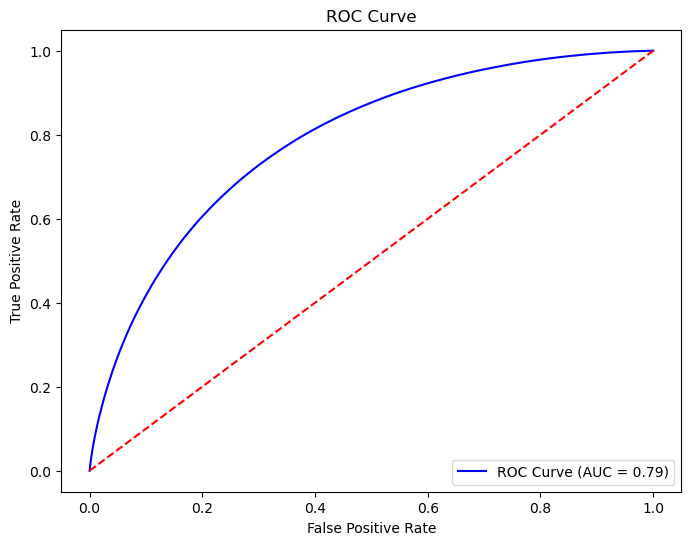

RMSE: 0.8627
ROC AUC: 0.7857
Precision: 0.7896
Recall: 0.7327
F1 Score: 0.7601


In [2]:
# Import necessary libraries
from sklearn.metrics import roc_curve, auc, precision_recall_fscore_support
from surprise import accuracy
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate ROC AUC
def plot_roc_auc(predictions, threshold=3.5):
    # Binary classification: Ratings above threshold are positive
    y_true = [1 if pred.r_ui >= threshold else 0 for pred in predictions]
    y_scores = [pred.est for pred in predictions]
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()
    
    return roc_auc

# Function to calculate Precision, Recall, and F1-score
def calculate_precision_recall_f1(predictions, threshold=3.5):
    # Binary classification: Ratings above threshold are positive
    y_true = [1 if pred.r_ui >= threshold else 0 for pred in predictions]
    y_pred = [1 if pred.est >= threshold else 0 for pred in predictions]
    
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')
    return precision, recall, f1

# Function to evaluate the SVD model
def evaluate_model(predictions):
    # Calculate RMSE
    rmse = accuracy.rmse(predictions, verbose=False)
    
    # Calculate ROC AUC
    roc_auc = plot_roc_auc(predictions)
    
    # Calculate Precision, Recall, and F1-score
    precision, recall, f1 = calculate_precision_recall_f1(predictions)
    
    # Print all metrics
    print(f"RMSE: {rmse:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

# Evaluate the model on the test set
evaluate_model(predictions)


𝟒. 𝐍𝐌𝐅 - (𝐍𝐨𝐧-𝐍𝐞𝐠𝐚𝐭𝐢𝐯𝐞 𝐌𝐚𝐭𝐫𝐢𝐱 𝐅𝐚𝐜𝐭𝐨𝐫𝐢𝐳𝐚𝐭𝐢𝐨𝐧)

In [1]:
import pandas as pd
from surprise import NMF, Reader, Dataset
import pandas as pd
import numpy as np
from surprise import NMF, Reader, Dataset, accuracy
from surprise.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

In [5]:
from surprise import NMF, Dataset, Reader
from surprise.model_selection import RandomizedSearchCV
import pandas as pd

# Load datasets
ratings_file = "ratings 20M.csv"
movies_file = "movies 20M.csv"
ratings_df = pd.read_csv(ratings_file)
movies_df = pd.read_csv(movies_file)

# Reader and data
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)

# Define hyperparameter space for RandomizedSearchCV
param_grid = {
    'n_factors': [10, 20],  # Reduced number of factors
    'n_epochs': [20, 50],  # Reduced number of epochs
    'reg_pu': [0.05, 0.1], # Regularization for users
    'reg_qi': [0.05, 0.1]  # Regularization for items
}

# Perform RandomizedSearchCV
nmf = NMF()
random_search = RandomizedSearchCV(NMF, param_grid, measures=['RMSE'], n_iter=1, cv=2)
random_search.fit(data)

# Retrieve the best model and parameters
best_nmf = random_search.best_estimator
best_params = random_search.best_params
print("Best hyperparameters:", best_params)


Best hyperparameters: {'rmse': {'n_factors': 10, 'n_epochs': 20, 'reg_pu': 0.1, 'reg_qi': 0.05}}


In [4]:
# Retrieve the best model and parameters
best_params = {'n_factors': 10, 'n_epochs': 20, 'reg_pu': 0.1, 'reg_qi': 0.05}

# Initialize the NMF model with the best parameters
best_nmf = NMF(n_factors=best_params['n_factors'], 
               n_epochs=best_params['n_epochs'], 
               reg_pu=best_params['reg_pu'], 
               reg_qi=best_params['reg_qi'])

ratings_file = "ratings 20M.csv"
movies_file = "movies 20M.csv"
ratings_df = pd.read_csv(ratings_file)
movies_df = pd.read_csv(movies_file)

# Reader and data
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)
# best_nmf = random_search.best_estimator['rmse']  # Correctly fetch the trained model
# best_params = random_search.best_params['rmse']  # Correctly fetch the best hyperparameters
# print("Best hyperparameters:", best_params)

# Train the best model on the full trainset
trainset = data.build_full_trainset()
best_nmf.fit(trainset)  # Train the model

# Function to get movie ID from title
def get_movie_id(movie_title, movies_df):
    search = movies_df[movies_df['title'].str.contains(movie_title, case=False, na=False)]
    return search

# Function to get recommendations
def get_recommendations(movie_id, algo, trainset):
    movie_ids = trainset.all_items()  # Get all movie IDs
    predictions = []
    for other_movie_id in movie_ids:
        if other_movie_id != movie_id:  # Skip the input movie itself
            pred = algo.predict(trainset.to_raw_uid(0), trainset.to_raw_iid(other_movie_id))  # Predict
            predictions.append((pred.iid, pred.est))
    predictions.sort(key=lambda x: x[1], reverse=True)  # Sort by predicted rating
    return predictions

# Function to print recommendations in ranges
def print_recommendations(predictions, movies_df):
    # Group predictions by rating ranges
    grouped_recommendations = {5: [], 4: [], 3: [], 2: [], 1: []}
    for movie_id, rating in predictions:
        rounded_rating = int(rating)  # Convert to integer rating (e.g., 4.7 -> 4)
        if rounded_rating > 5:
            rounded_rating = 5
        elif rounded_rating < 1:
            rounded_rating = 1
        grouped_recommendations[rounded_rating].append((movie_id, rating))

    # Print recommendations for each rating range
    for rating_range in sorted(grouped_recommendations.keys(), reverse=True):
        if grouped_recommendations[rating_range]:
            print(f"\nRecommendations in range {rating_range}:")
            for movie_id, rating in grouped_recommendations[rating_range][:5]:  # Limit to top 5 per range
                movie_title = movies_df.loc[movies_df['movieId'] == int(movie_id), 'title'].values[0]
                print(f"{movie_title} - Predicted Rating: {rating:.2f}")

# User interaction
movie_title_input = input("Enter a partial movie name (or 'exit' to quit): ")
if movie_title_input.lower() == 'exit':
    exit()

matching_movies = get_movie_id(movie_title_input, movies_df)
if matching_movies.empty:
    print("No movies found with that title.")
else:
    print("Movies Found:")
    for index, row in matching_movies.iterrows():
        print(f"Movie ID: {row['movieId']}, Title: {row['title']}")

    movie_id_selected = int(input("Enter the Movie ID for recommendations: "))
    predictions = get_recommendations(movie_id_selected, best_nmf, trainset)
    print_recommendations(predictions, movies_df)

Enter a partial movie name (or 'exit' to quit):  twi


Movies Found:
Movie ID: 68, Title: French Twist (Gazon maudit) (1995)
Movie ID: 536, Title: Simple Twist of Fate, A (1994)
Movie ID: 736, Title: Twister (1996)
Movie ID: 1539, Title: Twin Town (1997)
Movie ID: 1723, Title: Twisted (1996)
Movie ID: 1791, Title: Twilight (1998)
Movie ID: 2582, Title: Twin Dragons (Shuang long hui) (1992)
Movie ID: 2675, Title: Twice Upon a Yesterday (a.k.a. Man with Rain in His Shoes, The) (1998)
Movie ID: 2725, Title: Twin Falls Idaho (1999)
Movie ID: 3119, Title: Bay of Blood (a.k.a. Twitch of the Death Nerve) (Reazione a catena) (1971)
Movie ID: 3262, Title: Twin Peaks: Fire Walk with Me (1992)
Movie ID: 3529, Title: Postman Always Rings Twice, The (1981)
Movie ID: 4558, Title: Twins (1988)
Movie ID: 5208, Title: Ninth Configuration, The (a.k.a. Twinkle, Twinkle, Killer Kane) (1980)
Movie ID: 7046, Title: Witches of Eastwick, The (1987)
Movie ID: 7321, Title: Twisted (2004)
Movie ID: 7569, Title: You Only Live Twice (1967)
Movie ID: 7728, Title: Postm

Enter the Movie ID for recommendations:  63992



Recommendations in range 5:
Yumeji (1991) - Predicted Rating: 5.00
New Life, A (La vie nouvelle) (2002) - Predicted Rating: 5.00
Sasori (2008) - Predicted Rating: 5.00
Summer Wishes, Winter Dreams (1973) - Predicted Rating: 5.00
Hot Pepper (1973) - Predicted Rating: 5.00

Recommendations in range 4:
Otakus in Love (2004) - Predicted Rating: 4.98
From Dad to Son (2012) - Predicted Rating: 4.98
I Belong (Som du ser meg) (2012) - Predicted Rating: 4.97
Shepard & Dark (2012) - Predicted Rating: 4.97
Boogie (Boogie, el aceitoso) (2009) - Predicted Rating: 4.97

Recommendations in range 3:
Electric Dragon 80.000 V (2001) - Predicted Rating: 4.00
Carry on Cruising (1962) - Predicted Rating: 4.00
Best of Youth, The (La meglio gioventù) (2003) - Predicted Rating: 4.00
For Love or Country: The Arturo Sandoval Story (2000) - Predicted Rating: 4.00
Immigrant, The (1917) - Predicted Rating: 4.00

Recommendations in range 2:
Flash of Genius (2008) - Predicted Rating: 3.00
Razor's Edge, The (1984) -

𝐄𝐯𝐚𝐥𝐮𝐚𝐭𝐢𝐨𝐧 𝐨𝐟 𝐌𝐨𝐝𝐞𝐥

RMSE: 0.8655
RMSE: 0.865
Precision: 0.821
Recall: 0.369
AUC: 0.785
F-score: 0.510
Accuracy: 0.645


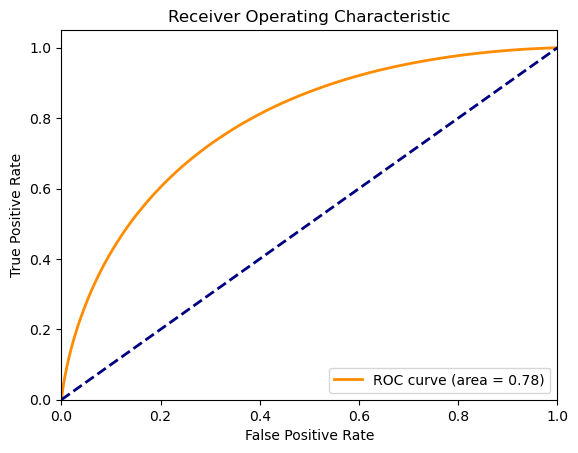

In [11]:
# Read files
#ratings_file = "/Users/soumyaindran/Desktop/ml-latest-small/ratings.csv"
#movies_file = "/Users/soumyaindran/Desktop/ml-latest-small/movies.csv"
#ratings_df = pd.read_csv(ratings_file)
#movies_df = pd.read_csv(movies_file)

ratings_df = pd.read_csv("ratings 20M.csv") 
#pd.read_csv(ratings_file)
movies_df = pd.read_csv("movies 20M.csv")
#pd.read_csv(movies_file)

# Reader and data
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)

# Train-test split
trainset, testset = train_test_split(data, test_size=0.25)

# Train the NMF model
algo = NMF()
algo.fit(trainset)
predictions = algo.test(testset)

# Calculate RMSE
rmse = accuracy.rmse(predictions)

# To calculate Precision, Recall, and AUC we need to define a threshold to determine what constitutes a "relevant" item.
threshold = 4.0  # Consider items with a predicted rating of 4.0 or higher as relevant
y_true = [1 if pred.r_ui >= threshold else 0 for pred in predictions]
y_score = [pred.est for pred in predictions]
y_pred = [1 if pred >= threshold else 0 for pred in y_score]

# Calculate precision and recall
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Calculate AUC
roc_auc = roc_auc_score(y_true, y_score)

# Print metrics
print(f"RMSE: {rmse:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"AUC: {roc_auc:.3f}")
print(f"F-score: {f1:.3f}")

# Accuracy (not typically used in rating prediction but calculated for completeness)
accuracy = np.mean(np.array(y_true) == np.array(y_pred))
print(f"Accuracy: {accuracy:.3f}")

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2  # Line width
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
